# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 2


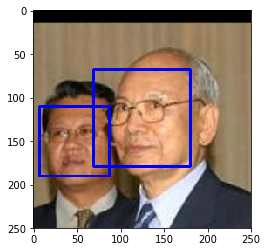

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[910])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
As I have checked length of detected faces in 100 images, below two numbers represents percentage of images present.

- **98%** of first 100 human faces are actually human faces

- **17%** of first 100 dog faces are actually human faces

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

In [4]:
# from tqdm import tqdm

# human_files_short = human_files[:100]
# dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_result = [human for human in human_files_short if face_detector(human)]
dog_result = [dog for dog in dog_files_short if face_detector(dog)]

print(len(human_result))
print(len(dog_result))

98
17


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

### optional exercise: Using local binary pattern- LBP Cascade Classifier

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.
import urllib

In [44]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/opencv/opencv/master/data/lbpcascades/lbpcascade_frontalface_improved.xml','data/lbpcascade_frontalface_improved.xml')

('data/lbpcascade_frontalface_improved.xml',
 <http.client.HTTPMessage at 0x7f3866e30860>)

In [48]:
face_cascade2 = cv2.CascadeClassifier('data/lbpcascade_frontalface_improved.xml')

def face_detector2(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade2.detectMultiScale(gray)
    return len(faces) > 0

human_result = [human for human in human_files_short if face_detector2(human)]
dog_result = [dog for dog in dog_files_short if face_detector2(dog)]

print(len(human_result))
print(len(dog_result))

82
6


### RESULT : as we can see above this technique of LBP classifier is less accurate for human dataset while more accurate in dog dataset

- **82%** of first 100 human faces are actually human faces 

- **6%** of first 100 dog faces are actually human faces.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 100863945.92it/s]


In [7]:
use_cuda

True

## using GPU for training!

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [10]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
#     processing image
    my_image = Image.open(img_path).convert('RGB')
    
    transform = transforms.Compose([
                        transforms.Resize(size=(244,244)),  #resize to (244,244) as per vgg design specification
                        transforms.ToTensor()]) 

    my_image = transform(my_image)[:3,:,:].unsqueeze(0)
    
    # moving image to gpu device if available
#     if use_cuda:
#         my_image.cuda()
    VGG16.cpu()
    
    result = VGG16(my_image)
    
    return torch.max(result,1)[1].item() # predicted class index

In [11]:
VGG16_predict(dog_files[1])

243

*243 indicates "bull mastiff" category according to imagenet class label*

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [12]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    return VGG16_predict(img_path) in range(151,269) # true/false.

In [13]:
dog_detector(dog_files[800])

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__

- **0%** of `human_files_short` have detected dog, which is great result!

- **97%** of `dog_files_short` have detected dog

In [68]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_result = [human for human in human_files_short if dog_detector(human)]
dog_result = [dog for dog in dog_files_short if dog_detector(dog)]

print(len(human_result))
print(len(dog_result))

0
97


*here 0 and 97 denoted the percentage of dog detected in first 100 images of human and dog datasets respectively*

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [14]:
ls /data/dog_images/

test/  train/  valid/


In [14]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

train_path = '/data/dog_images/train/'
test_path = '/data/dog_images/test/'
valid_path = '/data/dog_images/valid'

# normalizing all images as per imagenet standards
standard_normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                          std=[0.229, 0.224, 0.225])

In [15]:
# adding a set of transformations to be performed in train/test/valid images, doing some data augmentations for better training

data_transforms_dict = {'train': transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     standard_normalize]),
                        
                   'valid': transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     standard_normalize]),
                        
                   'test': transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor(), 
                                     standard_normalize])
                  }

In [16]:
# now applying data transformations to each images in respective folders 

train_data = datasets.ImageFolder(train_path, transform = data_transforms_dict['train'])
valid_data = datasets.ImageFolder(valid_path, transform = data_transforms_dict['valid'])
test_data = datasets.ImageFolder(test_path, transform = data_transforms_dict['test'])

In [17]:
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)

valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)

loaders_scratch = {'train': train_loader,
                'valid': valid_loader,
                'test': test_loader}

In [18]:
len(train_data), len(valid_data), len(test_data)

(6680, 835, 836)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

- While resizing the image, as per the vgg16 architecture, I resized the images to (224,244). Moreover, various transformations are also applied like randomly rotating the image, horizontal cropping, center cropping, converting the numpy array of images to tensor for processing and normalizing the dataset using standard mean and standard deviation measure as per imagenet specification.


- I also decided to do image augmentation as it will help generalize more the training process and also helps prevent overfitting. Various technique like horizontal flip, random rotations are used so it gives different view of same image and hence while training the network gets different perspectives of the same image and it won't try to remember one pattern only for given image. Hence this choice will prevent overfitting of data also.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [19]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np    

In [20]:
total_dog_classes = 133

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # input image: (3, 224, 224) RGB imgage from vgg16 

        # first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3,3), stride=1, padding=1)
        
        # second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3), stride=1, padding=1)

        # third convolutional layer
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), stride=1, padding=1)
        
        # adding pooling to reduce the input size
        self.pool = nn.MaxPool2d(kernel_size=(2,2))
        
        # adding fully connected layers
        # since we start with 3*224*224, after going this format of image from 3 conv layer with max pooling we will
        # get 28*28 and 128 is our final output dimension
        
        self.fc1 = nn.Linear(128*28*28, 512)
        self.fc2 = nn.Linear(512, total_dog_classes)  # 133 is the total classes of dog in our dataset
        
        # adding dropout layer
        self.dropout = nn.Dropout(p=0.30)

    
    def forward(self, x):
        ## Define forward behavior
        
        # adding series of convolution layers with relu activation function and max pooling layer 
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        # flattening the image
        x = x.view(-1, 128*28*28)
        
        # adding fully connected layer with dropout in between to prevent overfitting
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        
        # I am not adding dropout at the last layer since this is the classification layer
        x = F.relu(self.fc2(x))
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

- I followed few blogs and research paper and come to this architecture. Well we can try out other architecture too always :)


- I have used 3 convolutional layers since I can also go for more layers but this would make my network architecture more         complex which I don't need to make because the dataset is not that large. I picked ReLU activation function as this works out 
  to be more accurate in most of image classification tasks practically. Also pooling layer has been applied with kernel size 
  of (2,2) as this will reduce the size of image vector by half, thus less parameters will have to be trained, capturing the 
  essential part of the image only. Dropout layer has been added with dropout probability of 30% in each pass so that it will 
  help in reducing the overfitting of model. In last layer dropout is not needed since we have to do the classification there.
  
  
- During training, the input to our ConvNets is a fixed-size 224 × 224 RGB image.


- The image is passed through a stack of convolutional (conv.) layers, where we use filters with a very small receptive field:   3 × 3 (which is the smallest size to capture the notion of left/right, up/down, center).


- The convolution stride is fixed to 1 pixel.


- Spatial pooling is carried out by three max-pooling layers, which follow the conv. layers. Max-pooling is performed over a 
  2 × 2 pixel window.


- A stack of convolutional layers is followed by two Fully-Connected (FC) layers with last one having 133 classes since we have 
  133 different breed of dogs to be classified.
  
  
- All hidden layers are equipped with the rectification (ReLU) non-linearity. This layer will replace negative values with '0',   which potentially helps the neural network understand the non-linear relationships.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [28]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.005)

In [22]:
optimizer_scratch

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.05
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [23]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradient of previous iterations
            optimizer.zero_grad()
            
            output = model(data)
            
            # calculate the loss by comparing the generated output with actual label
            loss = criterion(output, target)
            
            # do backpropagation step
            loss.backward()
            
            # updating weights during backprop
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
                        
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %(epoch, batch_idx + 1, train_loss))
            
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            output = model(data)
            
            loss = criterion(output, target)
            
            valid_loss = valid_loss + ((1/(batch_idx+1)) * (loss.data - valid_loss))
            
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            
            torch.save(model.state_dict(), save_path)
            
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
            
            # updating the minimum validation loss
            valid_loss_min = valid_loss
        
    # return trained model
    return model


In [25]:
# train the model
model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch 1, Batch 1 loss: 4.736107
Epoch 1, Batch 101 loss: 4.811242
Epoch 1, Batch 201 loss: 4.796836
Epoch 1, Batch 301 loss: 4.790479
Epoch: 1 	Training Loss: 4.786051 	Validation Loss: 4.667874
Validation loss decreased (inf --> 4.667874).  Saving model ...
Epoch 2, Batch 1 loss: 4.634269
Epoch 2, Batch 101 loss: 4.723578
Epoch 2, Batch 201 loss: 4.706151
Epoch 2, Batch 301 loss: 4.701087
Epoch: 2 	Training Loss: 4.698793 	Validation Loss: 4.590426
Validation loss decreased (4.667874 --> 4.590426).  Saving model ...
Epoch 3, Batch 1 loss: 4.685329
Epoch 3, Batch 101 loss: 4.642550
Epoch 3, Batch 201 loss: 4.654318
Epoch 3, Batch 301 loss: 4.649285
Epoch: 3 	Training Loss: 4.648879 	Validation Loss: 4.493913
Validation loss decreased (4.590426 --> 4.493913).  Saving model ...
Epoch 4, Batch 1 loss: 4.411904
Epoch 4, Batch 101 loss: 4.579053
Epoch 4, Batch 201 loss: 4.584342
Epoch 4, Batch 301 loss: 4.579741
Epoch: 4 	Training Loss: 4.582511 	Validation Loss: 4.442890
Validation loss de

now i have modified the learning rate and retrained as the test accuracy very less

In [29]:
# train the model
model_scratch = train(15, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch 1, Batch 1 loss: 4.256183
Epoch 1, Batch 101 loss: 4.159394
Epoch 1, Batch 201 loss: 4.128850
Epoch 1, Batch 301 loss: 4.127828
Epoch: 1 	Training Loss: 4.122586 	Validation Loss: 3.962983
Validation loss decreased (inf --> 3.962983).  Saving model ...
Epoch 2, Batch 1 loss: 3.977145
Epoch 2, Batch 101 loss: 4.077991
Epoch 2, Batch 201 loss: 4.061026
Epoch 2, Batch 301 loss: 4.060669
Epoch: 2 	Training Loss: 4.060556 	Validation Loss: 3.929905
Validation loss decreased (3.962983 --> 3.929905).  Saving model ...
Epoch 3, Batch 1 loss: 4.174580
Epoch 3, Batch 101 loss: 4.056144
Epoch 3, Batch 201 loss: 4.050777
Epoch 3, Batch 301 loss: 4.056575
Epoch: 3 	Training Loss: 4.048934 	Validation Loss: 3.902938
Validation loss decreased (3.929905 --> 3.902938).  Saving model ...
Epoch 4, Batch 1 loss: 4.557436
Epoch 4, Batch 101 loss: 3.993987
Epoch 4, Batch 201 loss: 4.033786
Epoch 4, Batch 301 loss: 4.019823
Epoch: 4 	Training Loss: 4.023376 	Validation Loss: 3.897943
Validation loss de

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [30]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))


In [31]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.833857


Test Accuracy: 14% (121/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [32]:
## TODO: Specify data loaders

# using previously made loader
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [33]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)
model_transfer

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 59374202.64it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [34]:
model_transfer.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [35]:
model_transfer.fc.in_features, model_transfer.fc.out_features

(2048, 1000)

here we can see input and output dimension of resnet50, so we can specify size accordingly

In [36]:
# Freeze training for all "features" layers
for param in model_transfer.parameters():
    param.requires_grad = False

    
num_in_features = model_transfer.fc.in_features

#retrieving the final fully connected layer of resnet50 and replace it with our own linear layer 

model_transfer.fc = nn.Linear(num_in_features, total_dog_classes)  # total_dog_classes is 133 as defined above

if use_cuda:
    model_transfer = model_transfer.cuda()
    
print(model_transfer.fc)

Linear(in_features=2048, out_features=133, bias=True)


- it is verified that transfer learning is implemented as per our requirement as we changed the final fully connected layer

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

- In this implemented I used resnet50 for transfer learning as I find its good performance in transfer learning for image         classification tasks. It uses skip-connection technique which gives better result while dealing with dense network otherwise we would encounter various problem like vanishing gradient descent.


- Initially I loaded the pretrained weights of resnet50 from torchvision library.


- Then I verified that its final output layer has 1000 classes which is true for imagenet dataset, as we are using transfer learning for our task specific to dog breed classification, I changed the final output feature value to 133 which is total category of dog we are going to predict.


- Also I freezed all the model parameters so I don't have to retrain initials conv layers and others. It also imply that we are not going to change the weight of these layers while backpropagation in actual training of our last few fully connected layers.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [37]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.005)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [38]:
# train the model

n_epochs = 10

model_transfer =  train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, 
                        criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch 1, Batch 1 loss: 4.794471
Epoch 1, Batch 101 loss: 5.538375
Epoch 1, Batch 201 loss: 4.466987
Epoch 1, Batch 301 loss: 4.010604
Epoch: 1 	Training Loss: 3.894510 	Validation Loss: 1.696800
Validation loss decreased (inf --> 1.696800).  Saving model ...
Epoch 2, Batch 1 loss: 3.012341
Epoch 2, Batch 101 loss: 2.583911
Epoch 2, Batch 201 loss: 2.779725
Epoch 2, Batch 301 loss: 2.860218
Epoch: 2 	Training Loss: 2.879250 	Validation Loss: 1.816637
Epoch 3, Batch 1 loss: 2.315078
Epoch 3, Batch 101 loss: 2.554013
Epoch 3, Batch 201 loss: 2.675127
Epoch 3, Batch 301 loss: 2.800328
Epoch: 3 	Training Loss: 2.818537 	Validation Loss: 1.769923
Epoch 4, Batch 1 loss: 2.126148
Epoch 4, Batch 101 loss: 2.695024
Epoch 4, Batch 201 loss: 2.712927
Epoch 4, Batch 301 loss: 2.768085
Epoch: 4 	Training Loss: 2.770929 	Validation Loss: 1.859138
Epoch 5, Batch 1 loss: 5.077172
Epoch 5, Batch 101 loss: 2.596648
Epoch 5, Batch 201 loss: 2.714350
Epoch 5, Batch 301 loss: 2.809411
Epoch: 5 	Training Los

In [39]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [40]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.921114


Test Accuracy: 77% (644/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [41]:
print(loaders_transfer['train'].dataset.classes[0])
print(loaders_transfer['train'].dataset.classes[-1])

001.Affenpinscher
133.Yorkshire_terrier


In [44]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

In [45]:
class_names

['Affenpinscher',
 'Afghan hound',
 'Airedale terrier',
 'Akita',
 'Alaskan malamute',
 'American eskimo dog',
 'American foxhound',
 'American staffordshire terrier',
 'American water spaniel',
 'Anatolian shepherd dog',
 'Australian cattle dog',
 'Australian shepherd',
 'Australian terrier',
 'Basenji',
 'Basset hound',
 'Beagle',
 'Bearded collie',
 'Beauceron',
 'Bedlington terrier',
 'Belgian malinois',
 'Belgian sheepdog',
 'Belgian tervuren',
 'Bernese mountain dog',
 'Bichon frise',
 'Black and tan coonhound',
 'Black russian terrier',
 'Bloodhound',
 'Bluetick coonhound',
 'Border collie',
 'Border terrier',
 'Borzoi',
 'Boston terrier',
 'Bouvier des flandres',
 'Boxer',
 'Boykin spaniel',
 'Briard',
 'Brittany',
 'Brussels griffon',
 'Bull terrier',
 'Bulldog',
 'Bullmastiff',
 'Cairn terrier',
 'Canaan dog',
 'Cane corso',
 'Cardigan welsh corgi',
 'Cavalier king charles spaniel',
 'Chesapeake bay retriever',
 'Chihuahua',
 'Chinese crested',
 'Chinese shar-pei',
 'Chow cho

In [49]:
from PIL import Image
import torchvision.transforms as transforms

def predict_breed_transfer(img_path, model, class_names):
    # load the image and return the predicted breed
    
    # referenced from VGG16_predict() method defined above for processing image accordingly
    my_image = Image.open(img_path).convert('RGB')
    
    transform = transforms.Compose([
                        transforms.Resize(size=(224,224)),  #resize to (244,244) as per vgg design specification
                        transforms.ToTensor(),
                        standard_normalize]) 

    my_image = transform(my_image)[:3,:,:].unsqueeze(0)
    
    model = model.cpu()
    
    model.eval()
    
    breed_index = torch.argmax(model(my_image))
    
    return class_names[breed_index]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [86]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def display_image(img_path):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    
    
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
        
    if dog_detector(img_path):
        print('Hey dog is detected!')
        display_image(img_path)
        output = predict_breed_transfer(img_path, model_transfer, class_names)
        print(f'It belongs to category...  ')  
        print(f'{output} \n')  

    
    elif face_detector(img_path):
        print('Hello Human!')
        display_image(img_path)
        output = predict_breed_transfer(img_path, model_transfer, class_names)
        print(f'Aww, you look like...')  
        print(f'{output}\n')  

        
    else:
        print('Error! nothing detected!.... check your image once!\n')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

- Yeah the output is better than expected, with less training epochs and less tweak of hyperparameters, the model is performing   well. This is very good realization of transfer learning :)


- There are few more improvement areas:
    - *We can use other variation of pretrained model like inceptionv3, resnet101*
    - *We can do more hyperparameter tuning especially trying out different optimizer,more epochs and varying learning rates*
    - *Obvious area of improvement could be adding more dataset :)*
    - *We could try doing more image augmentation also.*
    - *Also we could add few more layers utilizing the complex neural net architecture. I mean, we can try different network          structure*

Hello Human!


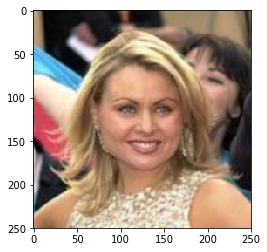

Aww, you look like...
English springer spaniel

Hello Human!


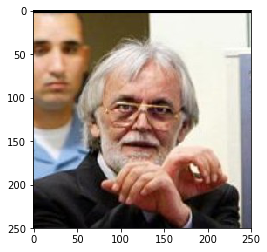

Aww, you look like...
Alaskan malamute

Hello Human!


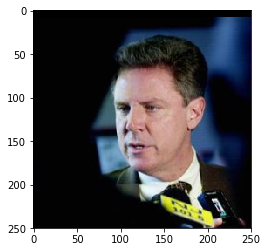

Aww, you look like...
Chihuahua

Hello Human!


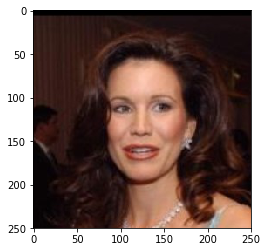

Aww, you look like...
Bull terrier

Hello Human!


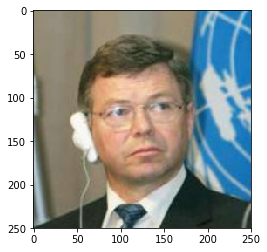

Aww, you look like...
Dachshund

Hey dog is detected!


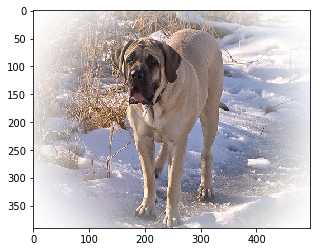

It belongs to category...  
Mastiff 

Hey dog is detected!


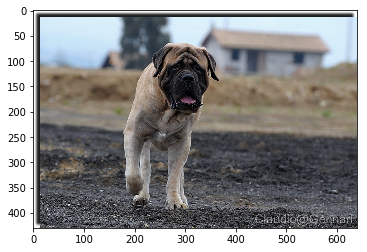

It belongs to category...  
Mastiff 

Hey dog is detected!


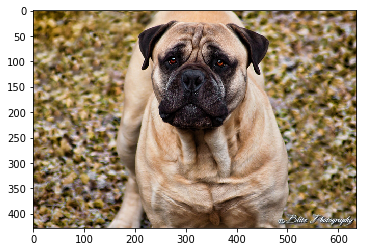

It belongs to category...  
Bullmastiff 

Hey dog is detected!


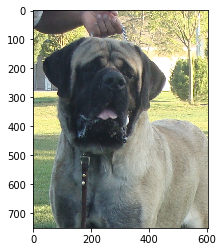

It belongs to category...  
Mastiff 

Hey dog is detected!


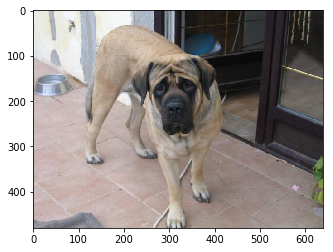

It belongs to category...  
Mastiff 



In [87]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[100:105], dog_files[50:55])):
    run_app(file)

### Prediction using images from my computer/ other than provided dataset

In [60]:
import urllib

urllib.request.urlretrieve('https://avatars1.githubusercontent.com/u/31946761?s=460&v=4','data/nirmal.jpg')
urllib.request.urlretrieve('https://statics.sportskeeda.com/editor/2020/04/8e188-15870368306240-500.jpg','data/human_1.png')
urllib.request.urlretrieve('https://i.insider.com/5e73b118c48540607e6d0202?width=1200&format=jpeg','data/human_2.jpg')
urllib.request.urlretrieve('https://cdn.akc.org/content/hero/gsd_bred_to_do_header_.jpg','data/dog_1.jpg')
urllib.request.urlretrieve('https://images.theconversation.com/files/319375/original/file-20200309-118956-1cqvm6j.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1200&h=1200.0&fit=crop','data/dog_2.jpg')
urllib.request.urlretrieve('https://d17fnq9dkz9hgj.cloudfront.net/uploads/2012/11/147029972-facts-about-new-dog-632x475.jpg','data/dog_3.jpg')

print('images downloaded!')

images downloaded!


In [55]:
ls data/

dog_1.jpg  dog_3.jpg    human_2.jpg                          nirmal.jpg
dog_2.jpg  human_1.png  lbpcascade_frontalface_improved.xml


In [78]:
new_human_images=['data/nirmal.jpg', 'data/human_1.png', 'data/human_2.jpg']
new_dog_images = ['data/dog_1.jpg','data/dog_2.jpg','data/dog_3.jpg']

Hello Human!


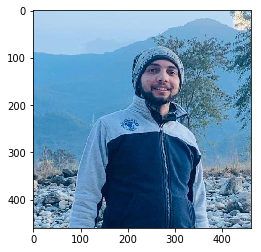

Aww, you look like...
Norwegian elkhound

Hello Human!


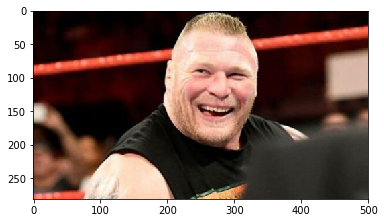

Aww, you look like...
Bull terrier

Hello Human!


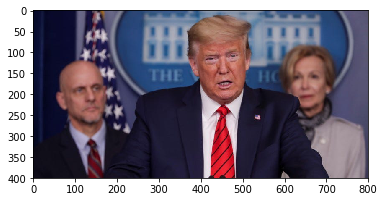

Aww, you look like...
Bull terrier

Hey dog is detected!


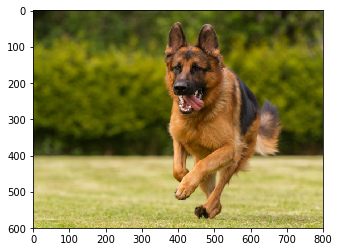

It belongs to category...  
German shepherd dog 

Hey dog is detected!


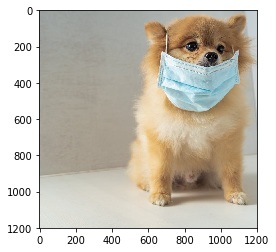

It belongs to category...  
Pomeranian 

Hey dog is detected!


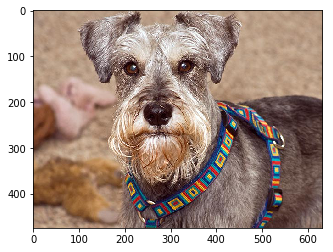

It belongs to category...  
Miniature schnauzer 



In [88]:
for file in np.hstack((new_human_images, new_dog_images)):
    run_app(file)